# Convoltion

In [1]:
import numpy as np
import scipy.io as sio
import scipy.signal as signal
from matplotlib import pyplot as plt
import copy

# Required for interactive plots in DataSpell
# import matplotlib
# matplotlib.use("nbagg")

### Generating data

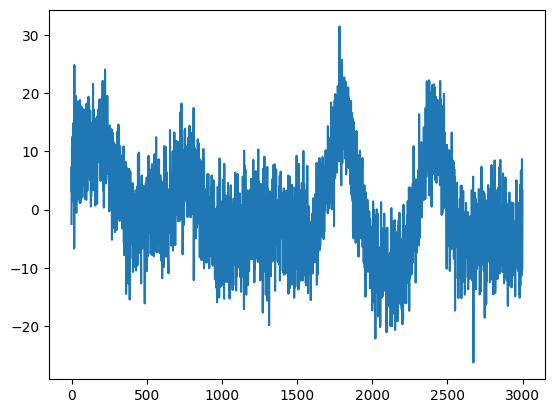

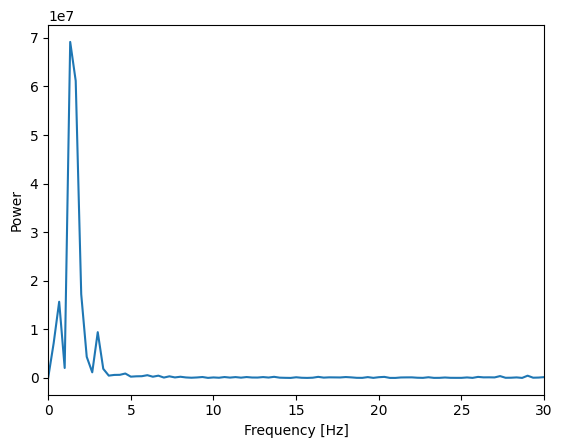

In [13]:
# simulation parameters
fs = 1000 # Hz
time  = np.arange(0,3,1/fs)
n     = len(time)
p     = 15 # poles for random interpolation

## create signal
# noise level, measured in standard deviations
noiseamp = 5

# amplitude modulator and noise level
ampl    = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
noise   = noiseamp * np.random.randn(n)
signal  = ampl + noise

# subtract mean to eliminate DC
signal = signal - np.mean(signal)

# Make plotting a fft easier
def plotFFT(data: np.ndarray, label: str = None):
    frequencies = np.fft.rfftfreq(data.size, 1/fs)
    # power = np.abs(np.fft.rfft(data) / data.size)**2
    power = np.abs(np.fft.rfft(data))**2
    plt.plot(frequencies, power, label=label)

plt.figure()
plt.plot(signal)

plt.figure()
plotFFT(signal)
plt.ylabel("Power")
plt.xlabel("Frequency [Hz]")
plt.xlim(0, 30)

plt.show()

### Designing the kernel

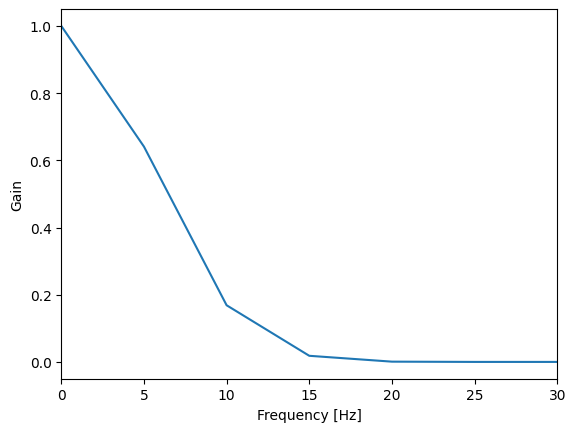

In [15]:
## create the Gaussian kernel
# full-width half-maximum: the key Gaussian parameter
fwhm = 50 # in ms

# normalized time vector in ms
k = 100
gtime = 1000*np.arange(-k,k)/fs

# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)

plt.figure()
plotFFT(gauswin)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Gain")
plt.xlim(0, 30)
plt.show()

### Applying the gaussian

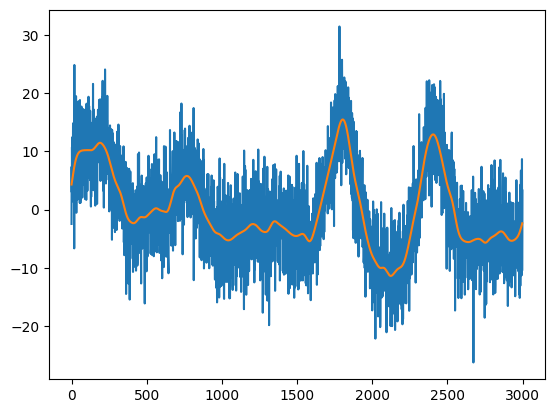

In [21]:
# Manual way:
# 1st get the ffts
nFFT = signal.size + gauswin.size - 1
signalFFT = np.fft.fft(signal, nFFT)
kernelFFT = np.fft.fft(gauswin, nFFT)

# 2nd multiply
filteredSignal = signalFFT * kernelFFT

# 3rd, inverse fft
filteredSignal = np.real(np.fft.ifft(filteredSignal))

# Finally, remove edge effects
filteredSignal = filteredSignal[k:-k]

# Automated way:
filteredSignal2 = np.convolve(signal, gauswin, 'same')
# filteredSignal = filteredSignal2

plt.figure()
plt.plot(signal)
plt.plot(filteredSignal)
plt.show()

Nice and Smooth!
### But what if we define the gaussian in the frequency domain?

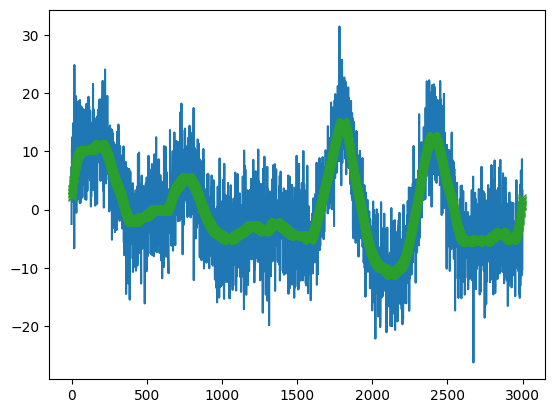

In [44]:
traditionallyFilteredSignal = filteredSignal

## create Gaussian spectral shape
# Gaussian parameters (in Hz)
peakf = 0           # Peak at 0Hz
fwhm  = 15          # +/- 7.5Hz at 0.5 gain

# vector of frequencies
hz = np.linspace(0, fs, n)

# frequency-domain Gaussian
s  = fwhm*(2*np.pi-1)/(4*np.pi)             # normalized width
x  = hz-peakf                               # shifted frequencies
kernelFFT = np.exp(-.5*(x/s)**2)            # gaussian

# Manual way:
# 1st get the fft
signalFFT = np.fft.fft(signal)

# 2nd multiply
filteredSignal = signalFFT * kernelFFT

# Finally, inverse fft
filteredSignal = 2 * np.real(np.fft.ifft(filteredSignal))   ## NEED TO MULTIPLY BY 2 (why?)

plt.figure()
plt.plot(signal)
plt.plot(filteredSignal)
plt.plot(traditionallyFilteredSignal, marker='x', linestyle="None")
# plt.xlim(0, 50)
plt.show()

Defining the gaussian in the frequency domain gives exactly the same results!